In [3]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [5]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


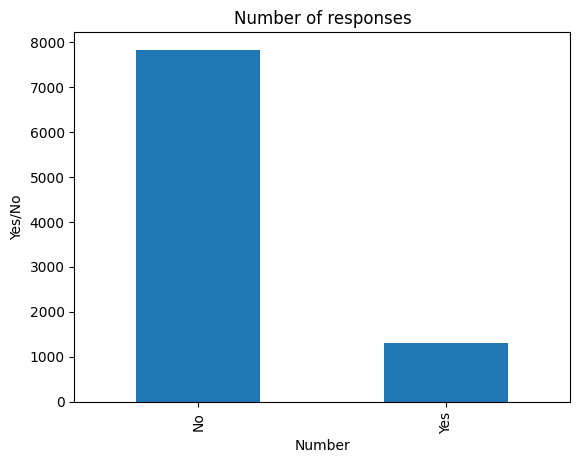

In [25]:
Response_counts = data['Response'].value_counts()
Response_counts.plot(kind = 'bar')
plt.title('Number of responses') 
plt.xlabel('Number')
plt.ylabel('Yes/No')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

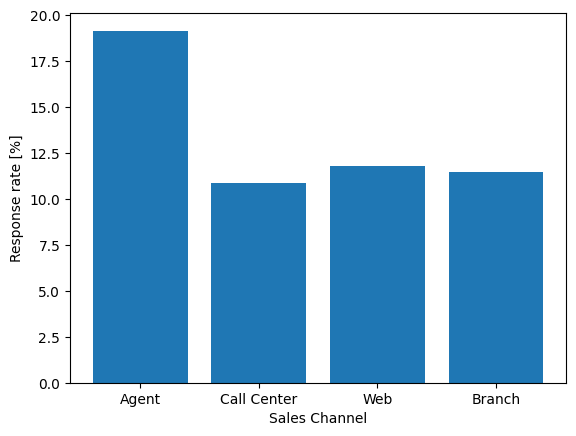

In [35]:
sales_channel = []
response_rate = []
for channel in data['Sales Channel'].unique():
    sales_channel.append(channel)
    filtered=data[(data['Sales Channel']==channel)]
    total_response = filtered['Response'].count()
    yes_response=filtered['Response'].value_counts()['Yes']
    percentage = yes_response/total_response*100
    response_rate.append(percentage)
plt.bar(x=sales_channel, height=response_rate)
plt.xlabel('Sales Channel')
plt.ylabel('Response rate [%]')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

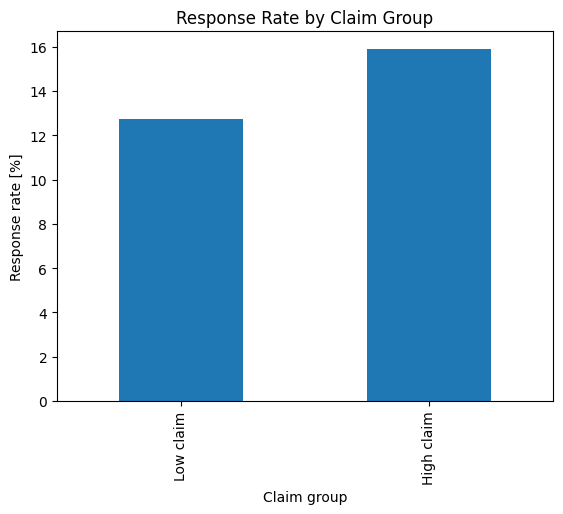

In [46]:
median_claim = data['Total Claim Amount'].median()
claim = pd.cut(data['Total Claim Amount'],bins=[0,median_claim, float('inf')],labels=['Low claim','High claim'])
response_rate_claim = data.groupby(claim)['Response'].value_counts(normalize=True).loc[:, 'Yes']*100
response_rate_claim.plot(kind='bar')
plt.title('Response Rate by Claim Group')
plt.xlabel('Claim group')
plt.ylabel('Response rate [%]')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

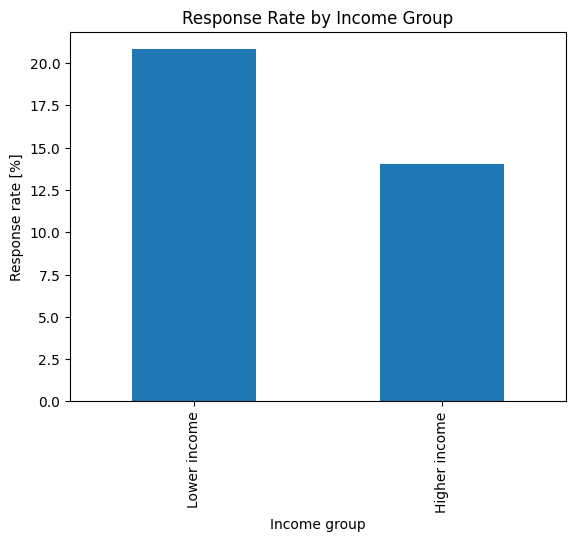

In [47]:
median_income = data['Income'].median()
income = pd.cut(data['Income'],bins=[0,median_income, float('inf')],labels=['Lower income','Higher income'])
response_rate_income = data.groupby(income)['Response'].value_counts(normalize=True).loc[:, 'Yes']*100
response_rate_income.plot(kind='bar')
plt.title('Response Rate by Income Group')
plt.xlabel('Income group')
plt.ylabel('Response rate [%]')
plt.show